
**Устанавливаем необходимые библиотеки**

In [1]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
import math           # Математический модуль
from matplotlib import rcParams # атрибут предоставляет доступ к настройкам и параметрам, управляющим внешним видом и поведением графиков
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов
from IPython.display import clear_output # clear_output позволяет удалить текущий вывод из ячейки в блокноте
from datetime import datetime # Для работы с датами
# Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline

In [2]:
# Загрузка файла из облака в colab
import gdown
file_id = '1StibINHcBTQ2JtIlrL9ZBlMGv2Nrv9eo'
gdown.download (f"https://drive.google.com/uc?id={file_id}", None, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1StibINHcBTQ2JtIlrL9ZBlMGv2Nrv9eo
To: /content/Kombinacii.csv
100%|██████████| 109M/109M [00:00<00:00, 162MB/s]


'Kombinacii.csv'

In [3]:
# Загрузка данных из файла
data = pd.read_csv('Kombinacii.csv')
data_backup = data.copy()
data.head()

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [4]:
# Параметр index_col определяет столбец, который будет использоваться как индекс
data = pd.read_csv('Kombinacii.csv', index_col=0)

# Выводим первых 7 строчек таблицы
data.head(7)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
6,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,не исследовались,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
7,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."


In [5]:
data.count()

Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  248832
Ответ эксперта (Лактионов)                                  24

In [6]:
data = data.iloc[:,0:17] # убираем два последних столбца, т.к. они не имеют значения для работы
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
id_ответа,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True


In [7]:
data.describe()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,4,2,2
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,False
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,140544,158976,158976


In [8]:
data.nunique()

Раса                                                        3
Пол                                                         2
Возраст                                                     2
Статус курения                                              3
ECOG                                                        2
Есть опухолевая нагрузка? (симптомная опухоль)              2
Ко-мутации KRAS                                             2
Ко-мутации p53.                                             2
Ко-мутации STK11                                            2
Ко-мутации KEAP1                                            2
Срок от окончания ХЛТ                                       3
Молекулярный статус (только для неплоскоклеточного рака)    6
PD-L1 статус                                                3
Предпочтение пациента по ответу на терапию                  2
Ответ эксперта (Лактионов)                                  4
Поставьте галочку, если уверены на 100%                     2
Если 75%

In [9]:
# Объединяем два последних столбца
def getYColumn(values): # Объявляем функцию с именем getYColumn, которая принимает один аргумент values.
  y_data = [] # Создаём пустой список y_data, в который будут добавляться новые значения
  for val in values: #  для всех элементов в списке values
    currentStr = '' # Создаём пустую строку currentStr, которая будет использоваться для формирования новых значений
    for i in range(len(val)): # для всех элементов каждой строки val из таблицы values
      currentStr += str(val[i])+' ' # К текущей строке currentStr добавляем строковое представление элемента val[i] с добавлением пробела
    y_data.append(currentStr)  # добавляем в список y_data
  return y_data

In [10]:
# записываем в столбец Ответ эксперта значения трёх последних столбцов
data['Ответ эксперта (Лактионов)']=getYColumn(data[['Ответ эксперта (Лактионов)','Поставьте галочку, если уверены на 100%','Если 75%']].values)
data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
id_ответа,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False,True,False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False,True,False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение False True,False,True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True,False,True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True,False,True


In [11]:
# Убираем лишние столбцы
del data['Поставьте галочку, если уверены на 100%']
del data['Если 75%']
data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение False True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True


In [12]:
data.nunique()

Раса                                                        3
Пол                                                         2
Возраст                                                     2
Статус курения                                              3
ECOG                                                        2
Есть опухолевая нагрузка? (симптомная опухоль)              2
Ко-мутации KRAS                                             2
Ко-мутации p53.                                             2
Ко-мутации STK11                                            2
Ко-мутации KEAP1                                            2
Срок от окончания ХЛТ                                       3
Молекулярный статус (только для неплоскоклеточного рака)    6
PD-L1 статус                                                3
Предпочтение пациента по ответу на терапию                  2
Ответ эксперта (Лактионов)                                  9
dtype: int64

In [13]:
# Перебираем все названия столбцов и для каждого выводим список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб True False ' 'Наблюдение False True '
 'Дурвалумаб False True ' 'Наблюдение True False '
 'Осимер

**Приведение датасета к векторному виду**

In [14]:
# Получаем названия столбцов датафрейма data и сохраняются в переменной data_colnames
data_colnames = data.columns.tolist()
# Определяем количество столбцов в датафрейме путем вычисления длины списка и сохраняем в переменной lst_count
lst_count = len(data_colnames)
# Циклом for перебираем индексы столбцов всей длины датафрейма data
for i in range(lst_count):
# Внутри цикла определяем текущее название столбца, на котором находится итерация, используя индекс i
  i_elem = data_colnames[i]
# print(f'названия колонок: {len(data_colnames)}: {data_colnames}')
  print(f"{i}->{lst_count}: '{i_elem}'")

0->15: 'Раса'
1->15: 'Пол'
2->15: 'Возраст'
3->15: 'Статус курения'
4->15: 'ECOG'
5->15: 'Есть опухолевая нагрузка? (симптомная опухоль)'
6->15: 'Ко-мутации KRAS'
7->15: 'Ко-мутации p53.'
8->15: 'Ко-мутации STK11'
9->15: 'Ко-мутации KEAP1'
10->15: 'Срок от окончания ХЛТ'
11->15: 'Молекулярный статус (только для неплоскоклеточного рака)'
12->15: 'PD-L1 статус'
13->15: 'Предпочтение пациента по ответу на терапию'
14->15: 'Ответ эксперта (Лактионов)'


In [15]:
# Создадим словарь, где каждому значению индекса столбца сопоставим массив уникальных значений ячейки, чтобы потом работать с индексами этого массива
# Функция словаря, который используется для хранения уникальных значений в каждом столбце нашего датафрейма
def getDictionary(data):
  dict={} # пустой словарь, который будет использован для хранения информации о столбцах

  for name in data_colnames: # цикл перебирает имена столбцов в data_colnames
   index = data_colnames.index(name) # получаем индекс текущего столбца в data_colnames, который будет использоваться как ключ в словаре
   uniq = data[name].unique() # Получаем уникальные значения в текущем столбце
   if uniq[0]!='0': # если первое уникальное значение в столбце не равно строке '0'
     a = np.insert(uniq, 0, '0') # создаём массив a, в который вставляется строка '0' в начало уникальных значений uniq, которые
     # будут использованы как значения, связанные с ключом index в словаре
     dict[index] =a # созданный массив a связывается с текущим индексом index в словаре dict.
   else: # если первое уникальное значение в столбце равно '0'
    dict [index] = data[name].unique() #  все уникальные значения из столбца name связываются с ключом index в словаре dict
  return dict # возвращаеv созданный словарь dict, который содержит уникальные значения для каждого столбца в data

dictionaryDefault = getDictionary(data) # функция getDictionary вызывается с data, и сохраняется в переменной dictionaryDefault
print(dictionaryDefault)

{0: array(['0', 'Азиатская', 'Европейская', 'Другая'], dtype=object), 1: array(['0', ' Мужской', ' Женский'], dtype=object), 2: array(['0', ' До 70', ' >70'], dtype=object), 3: array(['0', ' В настоящее время',
       ' Курение в прошлом (бросил более 1 месяца до 1 года)',
       ' Курение в прошлом (бросил более 1 года)'], dtype=object), 4: array(['0', ' 0-1', '2'], dtype=object), 5: array(['0', ' да', ' нет'], dtype=object), 6: array(['0', ' да', ' нет'], dtype=object), 7: array(['0', ' да', ' нет'], dtype=object), 8: array(['0', ' да', ' нет'], dtype=object), 9: array(['0', ' да', ' нет'], dtype=object), 10: array(['0', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
      dtype=object), 11: array(['0', ' нет мутаций', ' не исследовались', ' EGFR редкий вариант',
       ' EGFR ex19', ' EGFR ex21', ' ALK позитивный'], dtype=object), 12: array(['0', ' Не исследовался', ' Менее 1%', ' Более 1%'], dtype=object), 13: array(['0', ' Результативность лечения', ' сохранение качества жизни

In [16]:
# преобразует данные таблицы в категориальный вид
def getArgmaxData(values):
  all_data = [] # Здесь будем хранить кодированные значения

  for val in values: # цикл перебирает строки val, представленные как список values
    ohe = [] # создаём пустой список ohe, который будет представлять закодированную строку для x_data. Числовые индексы для каждого значения в строке

    for i in range(len(val)): # цикл перебирает значения в текущей строке val
      currentList =  dictionaryDefault[i].tolist() # получаем список уникальных значений для столбца с индексом i
      currentIndex = currentList.index(val[i]) # находим индекс значения val[i] в списке currentList
# создаём массив с одной "1" и остальными "0" на позиции, соответствующей индексу currentIndex
      a = np.argmax(list(utils.to_categorical(currentIndex, len(currentList)).astype('int')))
      ohe.append(a) # полученный индекс a добавляется в список ohe
    all_data.append(ohe) # после обработки всех значений в строке, закодированный список ohe добавляется в список all_data.

  return all_data

In [17]:
all_data = getArgmaxData(data.values) # таблица полностью, значения в формате argmax
categorical = pd.DataFrame(all_data,columns=data_colnames)
categorical.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,3
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1,3
5,1,1,1,1,1,1,1,1,1,1,3,2,1,1,2
6,1,1,1,1,1,1,1,1,1,1,1,3,1,1,4
7,1,1,1,1,1,1,1,1,1,1,2,3,1,1,4
8,1,1,1,1,1,1,1,1,1,1,3,3,1,1,4
9,1,1,1,1,1,1,1,1,1,1,1,4,1,1,5


**Исследуем данные с помощью таблиц корреляции**

<Axes: >

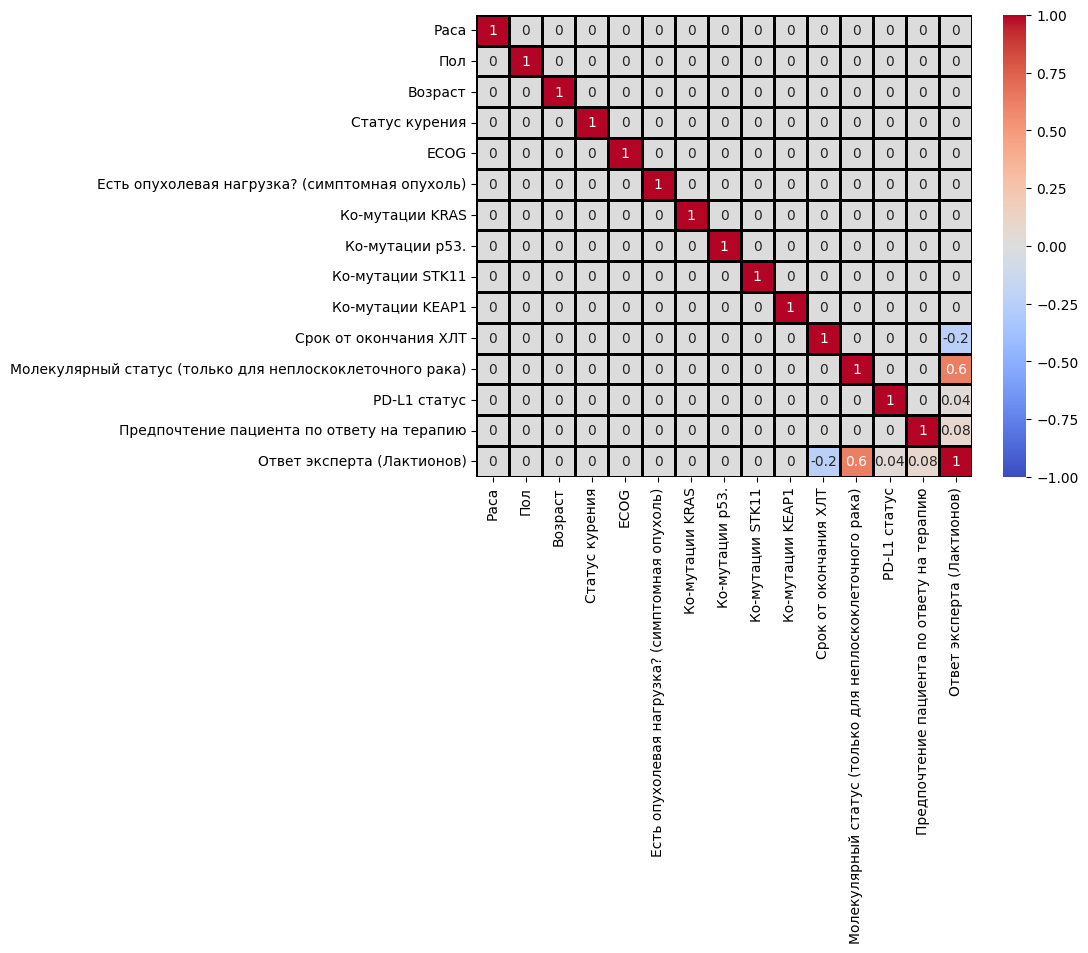

In [18]:
rcParams['figure.figsize'] = 8, 6 # увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman')
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

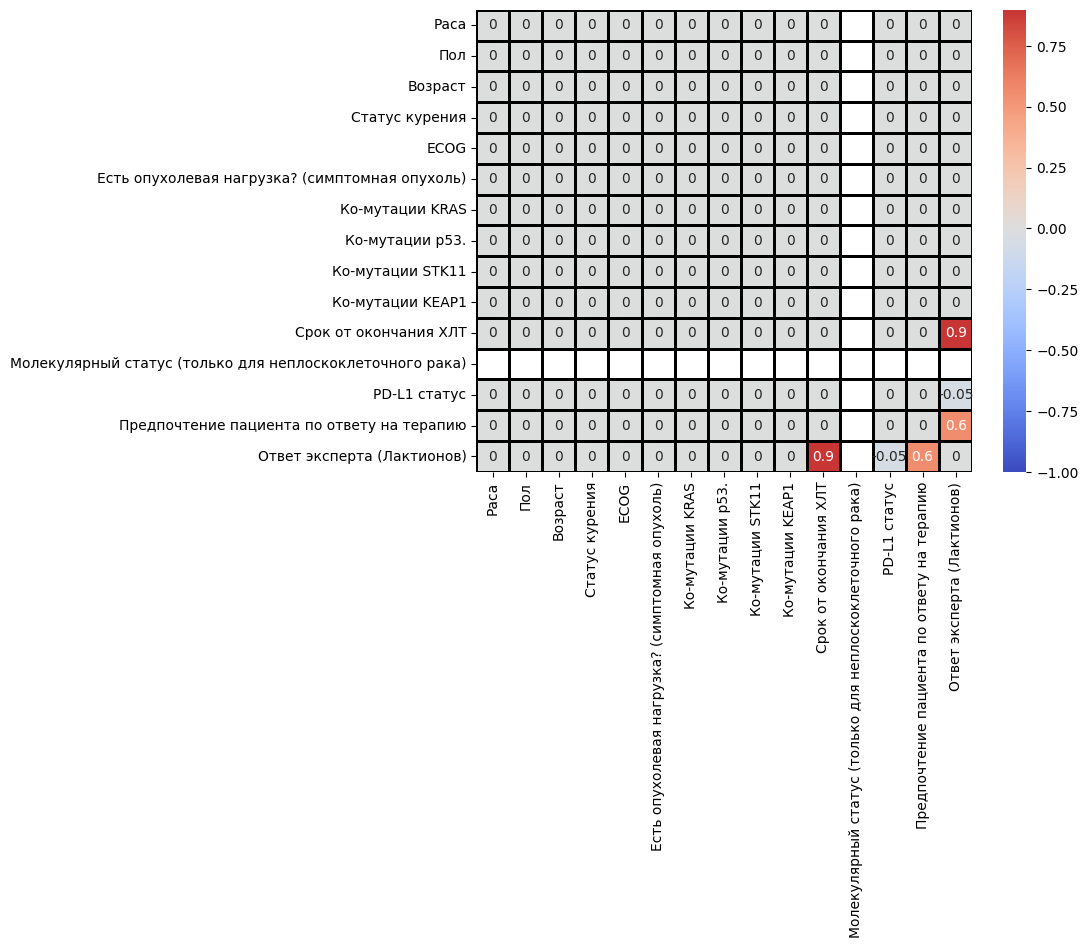

In [19]:
# Посмотрим на корреляцию для столбца Молекулярный статус (только для неплоскоклеточного рака)
corr_matrix = categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 1].corr('spearman')\
- categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 6].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

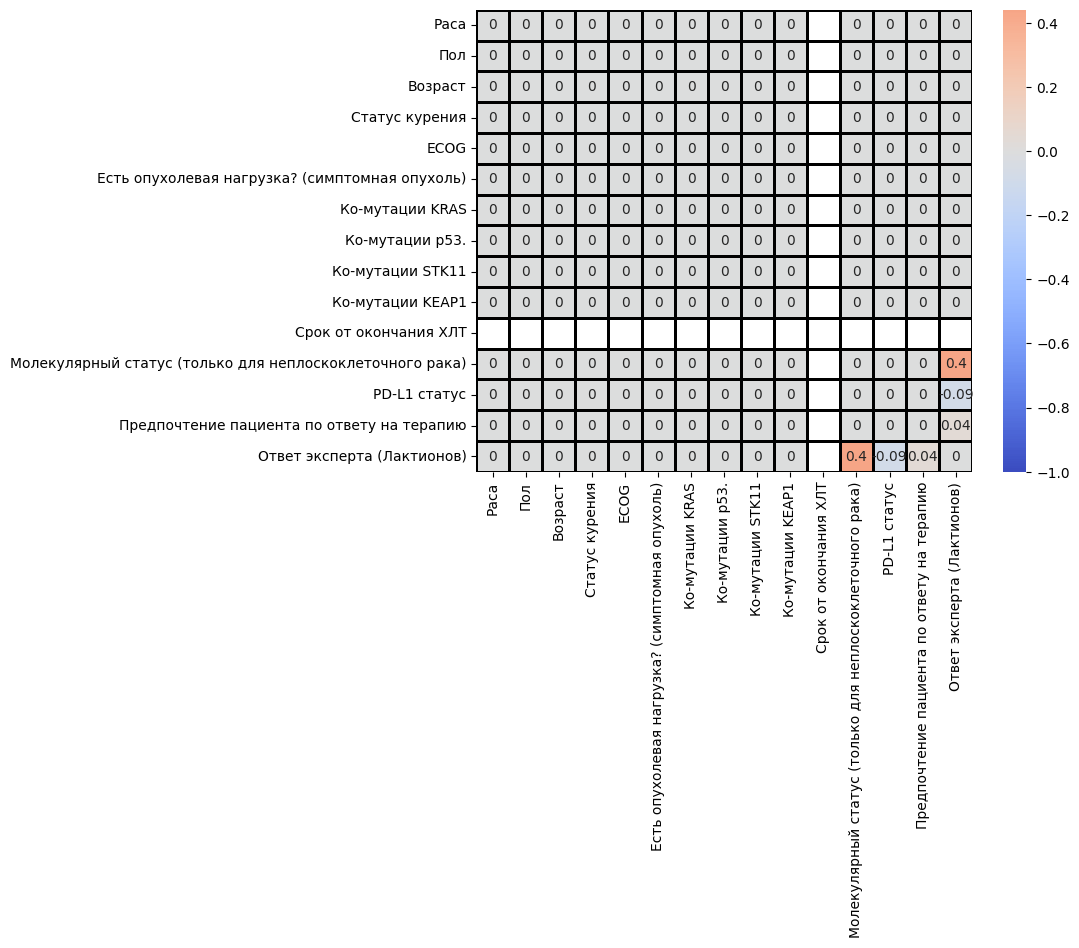

In [20]:
# Посмотрим на корреляцию для столбца Срок от окончания ХЛТ
corr_matrix = categorical[categorical['Срок от окончания ХЛТ'] == 1].corr('spearman')\
- categorical[categorical['Срок от окончания ХЛТ'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

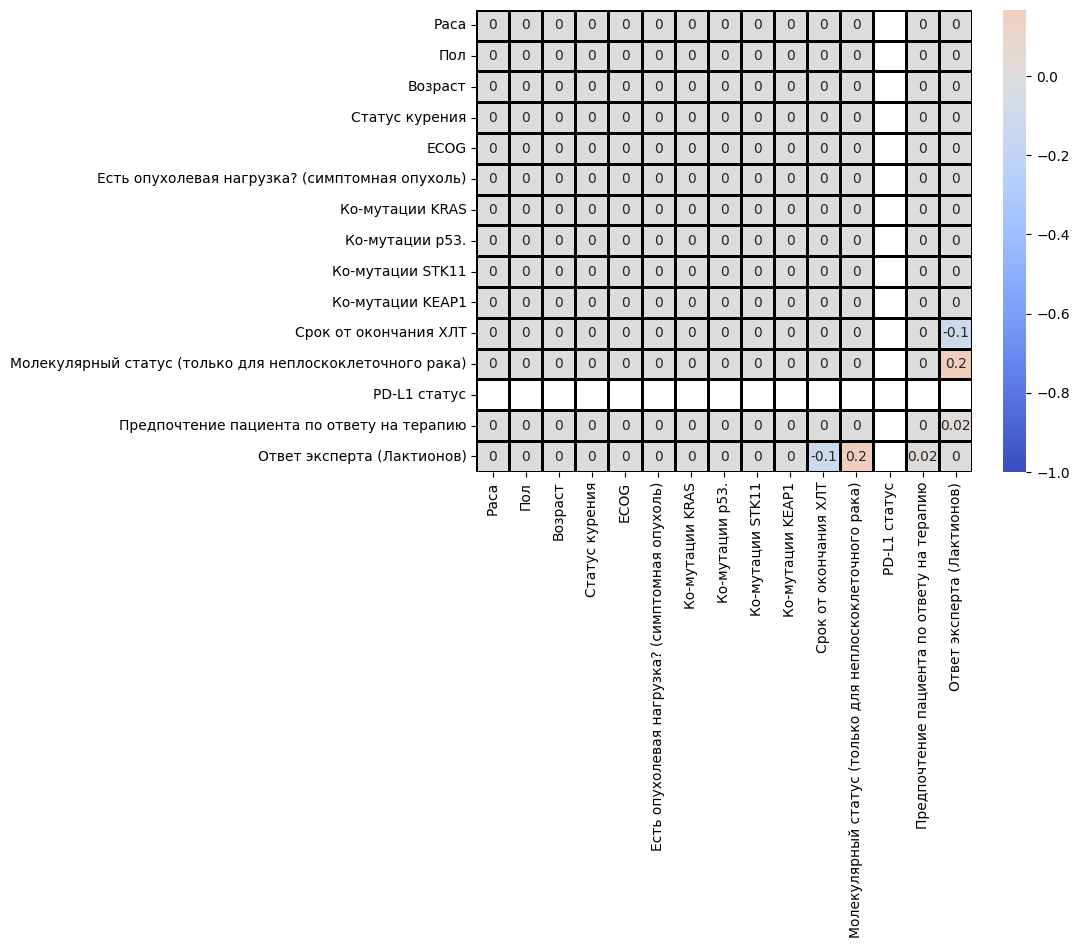

In [21]:
# Посмотрим на корреляцию для столбца PD-L1 статус
corr_matrix = categorical[categorical['PD-L1 статус'] == 1].corr('spearman')\
- categorical[categorical['PD-L1 статус'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

**Выявление лишних признаков с помощью feature_selection и  chi2**

**Feature Selection**

In [22]:
# импортируем класс SelectFromModel из модуля feature_selection в библиотеке sklearn
from sklearn.feature_selection import SelectFromModel
# импортируем класс LassoCV из модуля linear_model в библиотеке sklearn
from sklearn.linear_model import LassoCV

In [23]:
# создает объект регрессионной модели LassoCV,
# который будет использовать кросс-валидацию с 5 фолдами для обучения и выбора оптимальных коэффициентов регрессии Lasso
clf = LassoCV(cv=5)

In [24]:
# Создадим данные, необходимые для обучения и проверки модели машинного обучения
X = categorical[['Раса','Пол', 'Возраст','Статус курения','ECOG', 'Есть опухолевая нагрузка? (симптомная опухоль)','Ко-мутации KRAS', 'Ко-мутации p53.', 'Ко-мутации STK11','Ко-мутации KEAP1',\
                 'Срок от окончания ХЛТ', 	'Молекулярный статус (только для неплоскоклеточного рака)', 	'PD-L1 статус', 	'Предпочтение пациента по ответу на терапию']]
y = categorical['Ответ эксперта (Лактионов)']

In [25]:
# sfm будет использовать модель LassoCV для выбора наилучших признаков из X
sfm = SelectFromModel(clf)
# sfm будет содержать только те признаки из X, которые были выбраны как наиболее важные для модели LassoCV.
sfm.fit(X,y)

SelectFromModel(estimator=LassoCV(cv=5))

In [26]:
SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
                                 positive=False, precompute='auto', random_state=None,selection= 'cyclic', tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

SelectFromModel(estimator=LassoCV(cv=5))

In [27]:
# выбираем наиболее важные признаки из набора X на основе оценки важности признаков, предоставленной LassoCV.
n_features = sfm.transform(X).shape[1]
n_features

4

In [28]:
sfm.transform(X)

array([[1, 1, 1, 1],
       [2, 1, 1, 1],
       [3, 1, 1, 1],
       ...,
       [1, 6, 3, 2],
       [2, 6, 3, 2],
       [3, 6, 3, 2]])

In [29]:
sfm.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

**chi2**

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

In [31]:
# Выбираем 3 признака с наивысшим "хи-квадрат".
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)

# Вывод "до и после"
print("Количество признаков до преобразования:", X.shape[1])
print("Количество признаков после преобразования:", X_kbest_features.shape[1])
chi2_features.get_feature_names_out()

Количество признаков до преобразования: 14
Количество признаков после преобразования: 3


array(['Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'Предпочтение пациента по ответу на терапию'], dtype=object)

**Вывод**

Наиболее зависимые признаки: 'Молекулярный статус (только для неплоскоклеточного рака)', 'PD-L1 статус', 'Предпочтение пациента по ответу на терапию'. Особую важность имеет столбец 'Молекулярный статус (только для неплоскоклеточного рака)'.

**Делим таблицу на x-data и y_data**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_data = categorical.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
x_data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1


In [34]:
y_data = categorical.iloc[:, [14]]
y_data.head(5)

,Ответ эксперта (Лактионов)
0,1
1,1
2,2
3,3
4,3


In [35]:
y_data.nunique()

Ответ эксперта (Лактионов)    9
dtype: int64

**Разделяем данные на обучающий и тестовый наборы**

In [36]:
# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Преобразовываем y_train и y_test в одномерные массивы
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

**ОБУЧЕНИЕ МОДЕЛЕЙ:**

**Модель логистической регрессии (Logistic Regression)**





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Инициализируем модель логистической регрессии с увеличенным числом итераций
clf = LogisticRegression(max_iter=2000)

# Обучаем модель на обучающем наборе
clf.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
predictions = clf.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Logistic Regression:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy of Logistic Regression: 0.5727891976611007
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.83      0.77      2770
           2       0.59      0.56      0.57      8255
           3       0.60      0.57      0.58      4134
           4       0.55      0.70      0.61     15144
           5       0.54      0.74      0.62      5554
           6       0.00      0.00      0.00      2809
           7       0.00      0.00      0.00      4686
           8       0.83      1.00      0.91      4562
           9       0.00      0.00      0.00      1853

    accuracy                           0.57     49767
   macro avg       0.42      0.49      0.45     49767
weighted avg       0.49      0.57      0.53     49767



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Метод опорных векторов(Support Vector Machine)**

In [ ]:
# Импортируем SVC из библиотеки sklearn
from sklearn.svm import SVC

# Инициализируем модель Support Vector Classifier (SVC)
svc = SVC()

# Обучаем модель на обучающем наборе
svc.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
svc_predictions = svc.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Support Vector Classifier:", accuracy_score(y_test, svc_predictions))
print("Classification Report:")
print(classification_report(y_test, svc_predictions))

Accuracy of Support Vector Classifier: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2770
           2       1.00      1.00      1.00      8255
           3       1.00      1.00      1.00      4134
           4       1.00      1.00      1.00     15144
           5       1.00      1.00      1.00      5554
           6       1.00      1.00      1.00      2809
           7       1.00      1.00      1.00      4686
           8       1.00      1.00      1.00      4562
           9       1.00      1.00      1.00      1853

    accuracy                           1.00     49767
   macro avg       1.00      1.00      1.00     49767
weighted avg       1.00      1.00      1.00     49767



**Случайный лес(Random Forest)**

In [ ]:
# Импортируем RandomForestClassifier из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier

# Инициализируем модель RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающем наборе
rf_classifier.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
rf_predictions = rf_classifier.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Accuracy of Random Forest Classifier: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2770
           2       1.00      1.00      1.00      8255
           3       1.00      1.00      1.00      4134
           4       1.00      1.00      1.00     15144
           5       1.00      1.00      1.00      5554
           6       1.00      1.00      1.00      2809
           7       1.00      1.00      1.00      4686
           8       1.00      1.00      1.00      4562
           9       1.00      1.00      1.00      1853

    accuracy                           1.00     49767
   macro avg       1.00      1.00      1.00     49767
weighted avg       1.00      1.00      1.00     49767



**Градиентный бустинг(Gradient Boosting)**

In [ ]:
# Импортируем GradientBoostingClassifier из библиотеки sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Инициализируем модель GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающем наборе
gb_classifier.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
gb_predictions = gb_classifier.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Gradient Boosting Classifier:", accuracy_score(y_test, gb_predictions))
print("Classification Report:")
print(classification_report(y_test, gb_predictions))

Accuracy of Gradient Boosting Classifier: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2770
           2       1.00      1.00      1.00      8255
           3       1.00      1.00      1.00      4134
           4       1.00      1.00      1.00     15144
           5       1.00      1.00      1.00      5554
           6       1.00      1.00      1.00      2809
           7       1.00      1.00      1.00      4686
           8       1.00      1.00      1.00      4562
           9       1.00      1.00      1.00      1853

    accuracy                           1.00     49767
   macro avg       1.00      1.00      1.00     49767
weighted avg       1.00      1.00      1.00     49767



**K-ближайших соседей(K-Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем и обучаем модель KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors - количество соседей
knn_model.fit(x_train, y_train)

# Предсказываем значения на тестовом наборе
knn_predictions = knn_model.predict(x_test)

# Оценка производительности
knn_accuracy = knn_model.score(x_test, y_test)
print(f'Accuracy of K-Nearest Neighbors: {knn_accuracy}')

# Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, knn_predictions))

Accuracy of K-Nearest Neighbors: 0.987220447284345
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      2770
           2       0.98      0.99      0.99      8255
           3       0.96      0.95      0.95      4134
           4       1.00      1.00      1.00     15144
           5       0.98      1.00      0.99      5554
           6       1.00      0.98      0.99      2809
           7       1.00      0.99      0.99      4686
           8       0.98      1.00      0.99      4562
           9       1.00      0.90      0.94      1853

    accuracy                           0.99     49767
   macro avg       0.98      0.98      0.98     49767
weighted avg       0.99      0.99      0.99     49767



**Модель с TensorFlow**

Epoch 1/10
4977/4977 [==============================] - 17s 3ms/step - loss: 0.1915 - accuracy: 0.9387 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/10
4977/4977 [==============================] - 14s 3ms/step - loss: 3.0195e-04 - accuracy: 1.0000 - val_loss: 3.9616e-05 - val_accuracy: 1.0000
Epoch 3/10
4977/4977 [==============================] - 15s 3ms/step - loss: 1.2677e-05 - accuracy: 1.0000 - val_loss: 2.1612e-06 - val_accuracy: 1.0000
Epoch 4/10
4977/4977 [==============================] - 16s 3ms/step - loss: 7.2962e-07 - accuracy: 1.0000 - val_loss: 1.3950e-07 - val_accuracy: 1.0000
Epoch 5/10
4977/4977 [==============================] - 16s 3ms/step - loss: 4.8847e-08 - accuracy: 1.0000 - val_loss: 1.2061e-08 - val_accuracy: 1.0000
Epoch 6/10
4977/4977 [==============================] - 17s 3ms/step - loss: 1.2893e-08 - accuracy: 1.0000 - val_loss: 8.8839e-09 - val_accuracy: 1.0000
Epoch 7/10
4977/4977 [==============================] - 16s 3ms/step - loss: 0.0033 - accu

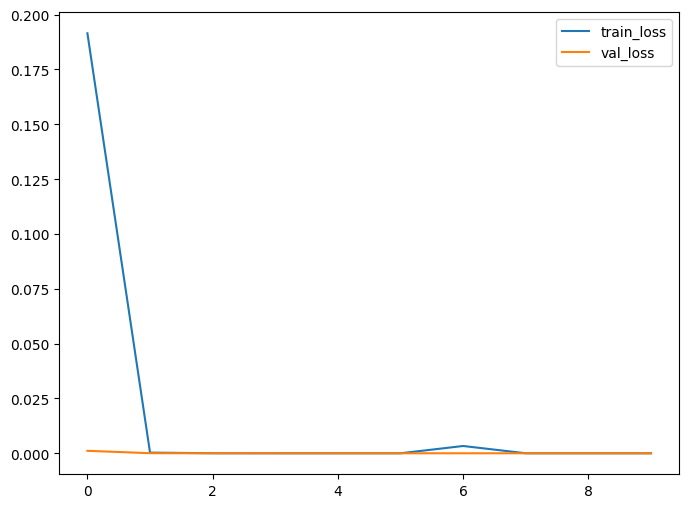

1556/1556 [==============================] - 5s 3ms/step - loss: 2.5606e-09 - accuracy: 1.0000
Accuracy of TensorFlow model: 1.0000


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Преобразовываем y_train и y_test в одномерные массивы
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Масштабирование данных
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Инициализация модели нейронной сети
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компилируем модель с указанием функции потерь
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель с использованием x_train и y_train с выделением 20% данных для валидации
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2)

# Выводим график потерь
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Оцениваем точность модели на тестовых данных
accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Accuracy of TensorFlow model: {accuracy[1]:.4f}')

**AutoKeras**

In [41]:
import autokeras as ak
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming x_data is your feature matrix and y_data is the target variable
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Convert data to pandas DataFrame (if not already)
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Create and train AutoModel
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=1)
clf.fit(x_train_df, y_train_df, epochs=10)

# Evaluate the model
accuracy = clf.evaluate(x_test_df, y_test_df)
print("Accuracy of AutoKeras model:", accuracy)

Trial 1 Complete [00h 08m 17s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 08m 17s
Epoch 1/10
6221/6221 [==============================] - 26s 4ms/step - loss: 0.3238 - accuracy: 0.8867
Epoch 2/10
6221/6221 [==============================] - 22s 4ms/step - loss: 9.9703e-04 - accuracy: 1.0000
Epoch 3/10
6221/6221 [==============================] - 23s 4ms/step - loss: 1.8523e-05 - accuracy: 1.0000
Epoch 4/10
6221/6221 [==============================] - 26s 4ms/step - loss: 5.4480e-07 - accuracy: 1.0000
Epoch 5/10
6221/6221 [==============================] - 23s 4ms/step - loss: 2.3232e-08 - accuracy: 1.0000
Epoch 6/10
6221/6221 [==============================] - 25s 4ms/step - loss: 6.1554e-04 - accuracy: 0.9998
Epoch 7/10
6221/6221 [==============================] - 23s 4ms/step - loss: 1.1130e-06 - accuracy: 1.0000
Epoch 8/10
6221/6221 [==============================] - 27s 4ms/step - loss: 9.0888e-08 - accuracy: 1.0000
Epoch 9/10
6221/6221 [==============

**Выводы:**

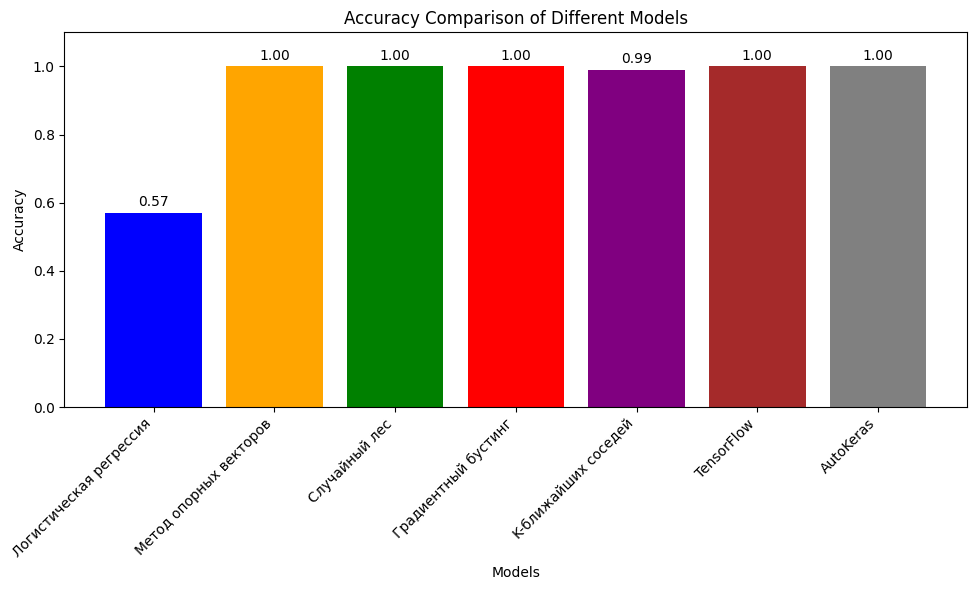

In [52]:
import matplotlib.pyplot as plt

# Создаем списки для хранения результатов обучения
model_names = ["Логистическая регрессия", "Метод опорных векторов", "Случайный лес", "Градиентный бустинг", "K-ближайших соседей", "TensorFlow", "AutoKeras"]
accuracies = [0.57, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0]

# Строим график
fig, ax = plt.subplots(figsize=(10, 6))

# Добавляем значения точности над столбцами
bars = ax.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray'])
for bar, accuracy, model_name in zip(bars, accuracies, model_names):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{accuracy:.2f}", ha='center', color='black')

# Настраиваем оси и легенду
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45, ha='right')  # Поворачиваем горизонтальные надписи под углом
plt.tight_layout()  # Делаем компактный макет
plt.ylim(0, 1.1)
plt.show()

**Выводы:**



1.   Модель **Логистическая регрессия** имеет очень маленькую точность.
2.   Модель **Метод опорных векторов** имеет высокую точность, но очень долго обучается. Ресурсоёмко.
3.   Модель **Случайный лес** имеет высокую точность, и очень быстро обучается, что и вызывает сомнения. Возможно что то сделал не так.
4.   Модель **Градиентный бустинг** так же имеет высокую точность, и очень быстро обучается, что и вызывает сомнения. Возможно что то сделал не так.
5.   Модель **K-ближайших соседей** имеет невысокую точность.
6.   Модель с **TensorFlow** имеет высокую точность и довольно недолго обучается. Имеет большую вариативность, и гибкость в выде графиков и параметров.
7.   Модель **AutoKeras** тоже меет высокую точность и довольно недолго обучается. Имеет большую вариативность, и гибкость в выде графиков и параметров. А также удобна в том, что имеет автоподбор.

**МОРАЛЬ:**

Для данного датасета по моему мнению больше всего подходят модели **TensorFlow** и **AutoKeras**

